In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import groupby

In [2]:
label=pd.read_csv('ID_Gender_Age_datasets.csv')
label=label.drop('Unnamed: 0',axis=1)

In [3]:
label=label[['Gender(0:Female;1:Male)','Age']]

In [8]:
lst = label['Age'].sort_values()
dic = {}

for k, g in groupby(lst, key=lambda x: (x-1)//5):
    dic['{}-{}'.format(k*5+1, (k+1)*5)] = len(list(g))
    
print(dic)

{'1-5': 27, '6-10': 187, '11-15': 107, '16-20': 43, '21-25': 63, '26-30': 31, '31-35': 34, '36-40': 83, '41-45': 91, '46-50': 36, '51-55': 22, '56-60': 10, '61-65': 8, '66-70': 11, '71-75': 8, '76-80': 2}


In [9]:
r1_5=label.iloc[lst[0:27].index].groupby(['Gender(0:Female;1:Male)']).count()
r6_10=label.iloc[lst[27:214].index].groupby(['Gender(0:Female;1:Male)']).count()
r11_15=label.iloc[lst[214:321].index].groupby(['Gender(0:Female;1:Male)']).count()
r16_20=label.iloc[lst[321:364].index].groupby(['Gender(0:Female;1:Male)']).count()
r21_25=label.iloc[lst[364:427].index].groupby(['Gender(0:Female;1:Male)']).count()
r26_30=label.iloc[lst[427:458].index].groupby(['Gender(0:Female;1:Male)']).count()
r31_35=label.iloc[lst[458:492].index].groupby(['Gender(0:Female;1:Male)']).count()
r36_40=label.iloc[lst[492:575].index].groupby(['Gender(0:Female;1:Male)']).count()
r41_45=label.iloc[lst[575:666].index].groupby(['Gender(0:Female;1:Male)']).count()
r46_50=label.iloc[lst[666:702].index].groupby(['Gender(0:Female;1:Male)']).count()
r51_55=label.iloc[lst[702:724].index].groupby(['Gender(0:Female;1:Male)']).count()
r56_60=label.iloc[lst[724:734].index].groupby(['Gender(0:Female;1:Male)']).count()
r61_65=label.iloc[lst[734:742].index].groupby(['Gender(0:Female;1:Male)']).count()
r66_70=label.iloc[lst[742:753].index].groupby(['Gender(0:Female;1:Male)']).count()
r71_75=label.iloc[lst[753:761].index].groupby(['Gender(0:Female;1:Male)']).count()
r76_80=label.iloc[lst[761:763].index].groupby(['Gender(0:Female;1:Male)']).count()

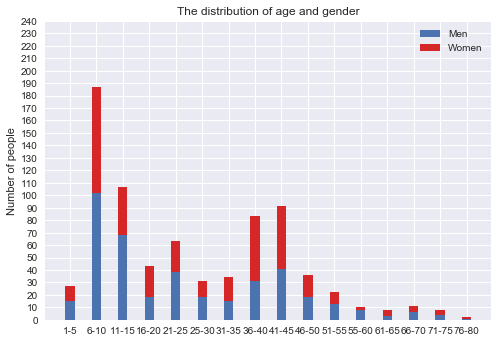

In [11]:
N = len(dic)

menMeans = (r1_5.iloc[1].values[0], r6_10.iloc[1].values[0], r11_15.iloc[1].values[0], r16_20.iloc[1].values[0], 
            r21_25.iloc[1].values[0], r26_30.iloc[1].values[0], r31_35.iloc[1].values[0], r36_40.iloc[1].values[0],
            r41_45.iloc[1].values[0], r46_50.iloc[1].values[0], r51_55.iloc[1].values[0], r56_60.iloc[1].values[0], 
            r61_65.iloc[1].values[0], r66_70.iloc[1].values[0], r71_75.iloc[1].values[0], r76_80.iloc[1].values[0])
womenMeans = (r1_5.iloc[0].values[0], r6_10.iloc[0].values[0], r11_15.iloc[0].values[0], r16_20.iloc[0].values[0], 
            r21_25.iloc[0].values[0], r26_30.iloc[0].values[0], r31_35.iloc[0].values[0], r36_40.iloc[0].values[0],
            r41_45.iloc[0].values[0], r46_50.iloc[0].values[0], r51_55.iloc[0].values[0], r56_60.iloc[0].values[0], 
            r61_65.iloc[0].values[0], r66_70.iloc[0].values[0], r71_75.iloc[0].values[0], r76_80.iloc[0].values[0])

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width, color='#d62728',
             bottom=menMeans)

plt.ylabel('Number of people')
plt.title('The distribution of age and gender')
plt.xticks(ind, ('1-5', '6-10', '11-15', '16-20', '21-25', '25-30', '31-35', '36-40',
                '41-45', '46-50', '51-55', '55-60', '61-65', '66-70', '71-75', '76-80'))
plt.yticks(np.arange(0, 250, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()